<a href="https://colab.research.google.com/github/ThiagoMonica/Imersao_Dados_Alura/blob/main/Aula_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Aula 3 - Imersão de Dados da Alura
###Correlações, Causalidades e Relações entre Genes

Na terceira aula de imersão, fizemos algumas análises observando as correlações entre os genes e vimos como podemos interpretar o *output* desse estudo.

In [8]:
#Import libs
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Captura da fonte dos dados a serem utilizados
url_dados = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'

#Leitura dos dados a partir do arquivo .zip
dados = pd.read_csv(url_dados, compression = 'zip')

mapa = {'droga':'composto'}
dados.rename(columns=mapa, inplace=True)
dados.head()

,id,tratamento,tempo,dose,composto,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


###Cruzando classes

Para realizar algumas análises e tentar entender o que acontece com os dados e quais suas relações, é importante cruza-los para observar seus comportamentos.

No *pandas*, podemos utilizar a função `crosstab()` que retorna esse agrupamento os dados.

In [2]:
pd.crosstab(dados['dose'],dados['tempo'])

tempo,24,48,72
dose,,,
D1,3886,4354,3907
D2,3886,3896,3885


In [3]:
pd.crosstab([dados['dose'],dados['tempo']], dados['tratamento'])

tratamento  com_controle  com_droga
dose tempo                         
D1   24              301       3585
     48              343       4011
     72              307       3600
D2   24              305       3581
     48              305       3591
     72              305       3580

####Desafio - Criar tabelas de frequência com pandas.groupby()

Esse agrupamento também pode ser feito através da função `groupby()` do **pandas**, usando o *count()* como agregador para mostrar as frequências.

In [35]:
dados.groupby(['dose'])['tempo'].count()

dose
D1    12147
D2    11667
Name: tempo, dtype: int64

In [36]:
dados.groupby(['dose','tempo'])['tratamento'].count()

dose  tempo
D1    24       3886
      48       4354
      72       3907
D2    24       3886
      48       3896
      72       3885
Name: tratamento, dtype: int64

####Desafio - Explorar o pandas *melt()*

A função melt () é útilizada para expandir uma tabela em um formato onde uma ou mais colunas são *ids*, enquanto todas as outras colunas são esparramadas para o eixo da linha, deixando apenas duas colunas não *ids*, variável e valor.

In [60]:
pd.melt(dados, id_vars =['dose','tempo'], value_vars =['g-0'])

,dose,tempo,variable,value
0,D1,24,g-0,1.0620
1,D1,72,g-0,0.0743
2,D1,48,g-0,0.6280
3,D1,48,g-0,-0.5138
4,D2,72,g-0,-0.3254
...,...,...,...,...
23809,D2,24,g-0,0.1394
23810,D2,24,g-0,-1.3260
23811,D2,48,g-0,0.3942
23812,D1,24,g-0,0.6660


In [61]:
pd.melt(dados, id_vars =['tratamento','dose'], value_vars =['c-12'])

,tratamento,dose,variable,value
0,com_droga,D1,c-12,1.0620
1,com_droga,D1,c-12,1.1110
2,com_droga,D1,c-12,-0.0397
3,com_droga,D1,c-12,-1.2750
4,com_droga,D2,c-12,0.1559
...,...,...,...,...
23809,com_droga,D2,c-12,1.3250
23810,com_droga,D2,c-12,-0.8000
23811,com_controle,D2,c-12,0.5093
23812,com_droga,D1,c-12,-0.3830


####Parametro `Normalize` 
Um dos parametros da função `crosstab()` é o normalize que gera as proporções das classes agrupadas.

Ao receber o valor *index*, a proporção é calculada na linha da tabela, ou seja, a soma de todas as células na linha deve ser 1 (100%).

In [5]:
pd.crosstab([dados['dose'],dados['tempo']], dados['tratamento'], normalize='index')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.077458   0.922542
     48         0.078778   0.921222
     72         0.078577   0.921423
D2   24         0.078487   0.921513
     48         0.078285   0.921715
     72         0.078507   0.921493

####Desafio - Normalizar o crosstab pela coluna

Já quando o normalize recebe *columns*, a proporção é calculada na coluna da tabela, ou seja, a soma de todas as células na coluna deve ser 1 (100%).

In [37]:
pd.crosstab([dados['dose'],dados['tempo']], dados['tratamento'], normalize='columns')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.161308   0.163341
     48         0.183816   0.182750
     72         0.164523   0.164024
D2   24         0.163451   0.163158
     48         0.163451   0.163614
     72         0.163451   0.163113

####Parametro `aggfunc`

O resultado da função também pode contar com agregadores que diversificam as análises dos *outputs*, como a média

In [7]:
pd.crosstab([dados['dose'],dados['tempo']], dados['tratamento'], values=dados['g-0'], aggfunc='mean')

tratamento  com_controle  com_droga
dose tempo                         
D1   24        -0.251760   0.367996
     48        -0.122773   0.412469
     72        -0.295271   0.286250
D2   24         0.010754   0.115253
     48         0.013174   0.214480
     72         0.070250   0.253439

####Desafio - Explorar outros agregadores


O `aggfunc` também conta com outros agregadores

In [40]:
#Minimo
pd.crosstab([dados['dose'],dados['tempo']], dados['tratamento'], values=dados['g-0'], aggfunc='min')

tratamento  com_controle  com_droga
dose tempo                         
D1   24           -2.370     -5.183
     48           -3.276     -5.420
     72           -2.086     -5.261
D2   24           -2.135     -5.233
     48           -4.859     -4.567
     72           -1.909     -5.513

In [41]:
#Maximo
pd.crosstab([dados['dose'],dados['tempo']], dados['tratamento'], values=dados['g-0'], aggfunc='max')

tratamento  com_controle  com_droga
dose tempo                         
D1   24            3.226      9.908
     48            3.423     10.000
     72            2.584      9.355
D2   24            2.601      7.167
     48            4.335     10.000
     72            4.670     10.000

In [45]:
#Soma
pd.crosstab([dados['dose'],dados['tempo']], dados['tratamento'], values=dados['g-0'], aggfunc='sum')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         -75.7799  1319.2648
     48         -42.1113  1654.4150
     72         -90.6483  1030.5010
D2   24           3.2800   412.7202
     48           4.0180   770.1980
     72          21.4262   907.3112

In [46]:
#Mediana
pd.crosstab([dados['dose'],dados['tempo']], dados['tratamento'], values=dados['g-0'], aggfunc='median')

tratamento  com_controle  com_droga
dose tempo                         
D1   24          -0.2912    0.02700
     48          -0.2145    0.01620
     72          -0.3655    0.02615
D2   24           0.0096   -0.02610
     48          -0.0506   -0.02960
     72           0.0528    0.00015

###Gráficos de Dispersão

É possível criar gráficos de dispersão com o seaborn usando a função `scatterplot()`

Aqui filtramos as classes que iremos utilizar no gráfico

In [47]:
#Filtrando a classe g-0 e g-3
dados[['g-0','g-3']]

,g-0,g-3
0,1.0620,-0.6208
1,0.0743,0.0604
2,0.6280,-0.0764
3,-0.5138,0.5288
4,-0.3254,0.6919
...,...,...
23809,0.1394,-0.5080
23810,-1.3260,0.9905
23811,0.3942,-0.7389
23812,0.6660,0.2044


O gráfico abaixo não parece seguir um padrão, ou seja, possuem baixa correlação, dado que há uma grande volumetria nas regiões próximas de g-0 = 2 e g-3 = 2 e, ao passo que g-0 cresce, g-3 adquire valores bem dispersos

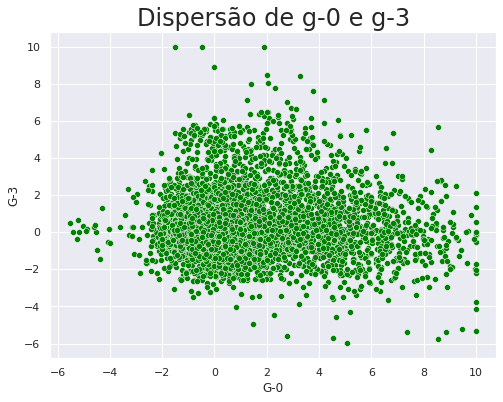

In [54]:
sns.set()
plt.figure(figsize=(8,6))

ax = sns.scatterplot(x='g-0',y='g-3', data=dados, color='green')
ax.set_title('Dispersão de g-0 e g-3',fontsize=24)
ax.set(xlabel='G-0', ylabel='G-3')

plt.show()

Já este gráfico parece possuir uma correlação maior, ou seja, possuem uma alta correlação, dado que, ao passo do crescimento de g-0, g-3 adquire valores valores menores, o que indica uma relação inversamente proporcional. Um cresce enquanto outro diminui.

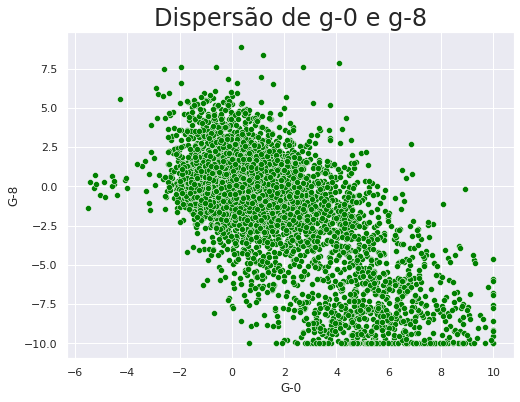

In [55]:
sns.set()
plt.figure(figsize=(8,6))

ax = sns.scatterplot(x='g-0',y='g-8', data=dados, color='green')
ax.set_title('Dispersão de g-0 e g-8',fontsize=24)
ax.set(xlabel='G-0', ylabel='G-8')

plt.show()

Com a função `lmplot()` do seaborn, a linha de comportamento dos dados mostra justamente a relação citada anteriormente. Uma linha que vem de cima e vai descendo.

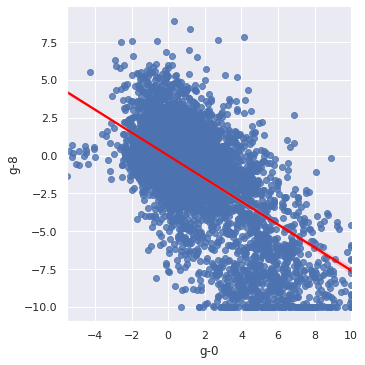

In [58]:
sns.lmplot(data=dados, x='g-0',y='g-8', line_kws={'color':'red'})

Os valores também podem ser agrupados com os parametros `col` e `row` da função.

Dos gráficos abaixo, podemos observar que os tratamentos com drogas entre g-0 e g-8 tem uma correlação inversamente proporcional. Já nos tratamentos com controle, a correlação é baixa e os valores seguem parecidos independente do tempo, o que é de fato esperado em um tratamento com controle.

Podemos obersevar também, nos tratamentos com drogas, que ao passar do tempo, os valores de g-8 vão diminuindo ainda mais enquanto os valores de g-0 aumentam. Isso pode indicar que quanto maior o tempo de experimento, maior é a correlação negativa entre essas classes

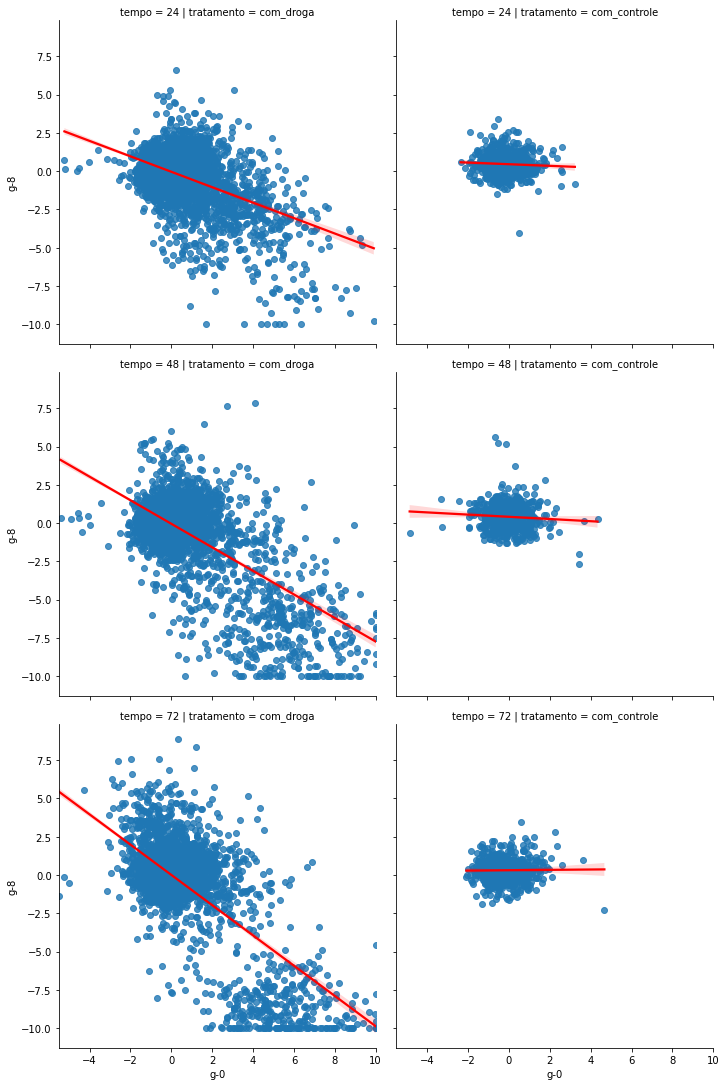

In [15]:
sns.lmplot(data=dados, x='g-0',y='g-8', line_kws={'color':'red'}, col='tratamento', row='tempo')

Os valores de correlação podem ser mostrados em uma tabela com a função `corr()`

In [17]:
dados.loc[:,'g-0':'g-771'].corr()

,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,g-36,g-37,g-38,g-39,...,g-732,g-733,g-734,g-735,g-736,g-737,g-738,g-739,g-740,g-741,g-742,g-743,g-744,g-745,g-746,g-747,g-748,g-749,g-750,g-751,g-752,g-753,g-754,g-755,g-756,g-757,g-758,g-759,g-760,g-761,g-762,g-763,g-764,g-765,g-766,g-767,g-768,g-769,g-770,g-771
g-0,1.000000,0.086032,0.176188,0.011266,0.403153,-0.165478,0.238348,-0.374451,-0.604212,-0.428779,-0.547606,0.219762,-0.199453,0.472223,-0.346179,-0.201323,-0.513026,-0.433536,-0.002073,-0.074622,-0.468599,0.052445,0.022269,-0.076298,-0.337522,-0.235191,-0.422814,0.148432,-0.471092,-0.296871,-0.528327,0.558136,-0.133229,-0.155987,-0.120247,0.327593,-0.147800,-0.591868,0.602623,0.450769,...,0.365095,-0.528006,0.295970,0.067108,-0.250243,-0.110665,-0.214344,-0.280492,-0.036098,-0.128288,-0.498922,-0.469595,0.673664,0.538050,0.297528,0.066530,0.240252,-0.170949,0.485924,-0.093815,0.397476,0.017923,0.321260,-0.131709,-0.133430,0.178220,0.201902,-0.205648,-0.676835,-0.433554,0.005085,-0.239410,0.548401,0.425222,-0.308095,-0.052622,0.300241,-0.127375,-0.514201,0.405908
g-1,0.086032,1.000000,-0.054518,-0.027855,0.193647,-0.151590,-0.122541,0.144537,-0.009973,-0.047558,-0.009051,0.161274,0.037178,-0.009256,0.002632,-0.070193,-0.063414,-0.000944,-0.023748,-0.034714,-0.131031,0.196596,-0.061441,0.090620,-0.004299,-0.032600,-0.019435,0.015661,-0.098907,-0.091071,-0.053331,-0.049514,0.187382,-0.091232,0.045417,0.044373,-0.077671,-0.005265,-0.042213,0.050546,...,-0.015556,-0.017184,0.043104,-0.189662,-0.050194,-0.007878,-0.083539,-0.042175,0.014307,-0.134166,-0.026985,0.088382,-0.077453,0.015545,-0.027527,-0.071078,-0.095445,0.049612,-0.040518,-0.074277,-0.022356,0.125763,-0.082779,0.020292,-0.023171,-0.207192,-0.066570,-0.057007,0.002062,0.029795,-0.205998,0.060051,0.115071,0.160140,0.015098,-0.003378,-0.030756,-0.006866,-0.095108,-0.032233
g-2,0.176188,-0.054518,1.000000,0.042633,0.013968,0.018516,0.015190,-0.144205,-0.128029,-0.081332,-0.105050,0.011198,-0.063501,0.082011,-0.082204,-0.059607,-0.137811,-0.085491,0.053335,0.028813,-0.061160,-0.129131,-0.007426,-0.034230,-0.128312,-0.067363,-0.126554,0.036984,-0.129481,-0.017941,-0.152288,0.172191,-0.100086,-0.033010,-0.015481,0.001098,-0.020374,-0.157977,0.169464,0.144449,...,0.089525,-0.140916,0.008587,0.042106,-0.018846,-0.008093,-0.074404,-0.080120,-0.020085,-0.028099,-0.098775,-0.113000,0.175916,0.119166,0.071051,0.025358,0.078971,-0.086326,0.149456,0.033432,0.124239,-0.006327,0.120148,-0.041162,-0.030040,0.048549,0.096369,0.000494,-0.172627,-0.130200,0.090115,-0.055655,0.138085,0.061574,-0.093631,-0.053149,0.115415,0.014489,-0.078661,0.103985
g-3,0.011266,-0.027855,0.042633,1.000000,-0.033039,0.042231,-0.043177,-0.175692,-0.086167,-0.014052,-0.074101,0.181024,0.030539,0.192727,0.128792,-0.045688,0.033974,-0.070920,0.237669,0.112392,0.027867,-0.167263,0.197013,-0.049480,-0.113336,0.175615,0.111355,0.007168,-0.022381,-0.128269,-0.042827,0.098416,-0.091962,-0.083806,0.184985,-0.070933,-0.317859,-0.228039,0.084346,0.054827,...,0.039519,0.000851,0.011655,-0.116724,0.304819,-0.087159,-0.134135,-0.031211,0.174116,0.060289,-0.119276,-0.140391,0.110547,0.145925,0.155011,0.049182,-0.007754,-0.128488,0.078139,0.012422,0.040728,0.164467,0.171886,-0.069777,0.066560,0.102111,-0.036922,0.111994,-0.133740,-0.226928,0.075982,0.178422,0.016467,-0.089317,-0.166426,-0.179370,0.028452,-0.206077,-0.002142,0.058219
g-4,0.403153,0.193647,0.013968,-0.033039,1.000000,-0.057449,0.206405,-0.032748,-0.474828,-0.274167,-0.458021,0.116467,-0.207078,0.210440,-0.307280,0.019531,-0.275700,-0.422889,-0.012207,-0.088152,-0.311798,0.286106,-0.055368,-0.113396,-0.120743,-0.233682,-0.340708,0.070292,-0.360274,-0.225461,-0.402256,0.324362,0.091731,-0.052787,-0.073490,0.195062,-0.124394,-0.277002,0.285256,0.300517,...,0.215930,-0.292602,-0.008241,-0.005070,-0.284391,-0.116918,-0.252399,-0.250280,0

###Heatmaps

Os gráficos de heatmaps nos ajudam a entender de forma mais visual e sumarizada os valores das classes.

Nesse caso, utilizamos os heatmaps para visualizar as correlações entre as diversas classes.

No gráfico abaixo podemos perceber que não há um padrão muito bem estabelecido entre as correlações das classes g-0 a g-50. Até pode-se perceber correlações um pouco mais altas entre algumas classes, mas isso não é refletido entre todo o grupo.

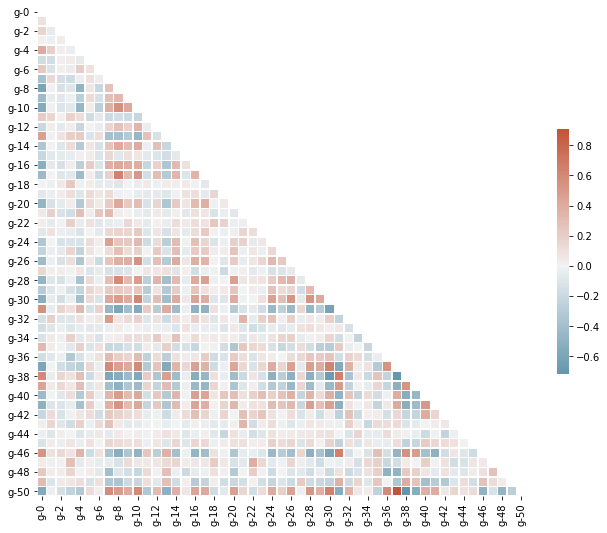

In [20]:
#Import numpy
import numpy as np

# Compute the correlation matrix
corr = dados.loc[:,'g-0':'g-50'].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

####Desafio - Estudar o código que plota a matriz de correlação (heatmap)
A explicação do código está nos comentários de cada linha da célula a seguir

Vendo o gráfico das correlações das classes c-0 a c-50, vemos que ele tem comportamento diferente das classes gs mostradas acima. Suas correlações são muito altas independentemente do intervalos.

Isso significa que a viabilidade celular (quantas celulas sobreviveram ou não à aplicação do composto) desses tipos de células são muito parecidos mesmo fazendo experimentos diferentes.

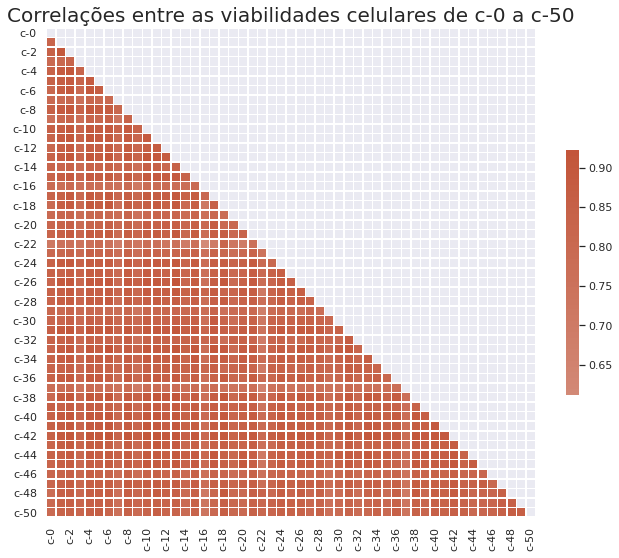

In [71]:
#Aqui pegamos as correlações das classes c-0 a c-50 em todas as linhas do conjunto 
corr_celular = dados.loc[:,'c-0':'c-50'].corr()

#Cria uma mascara a partir uma matriz de true com o mesmo shape de corr_celular  
#e muda para false todos os valores abaixo da última posição de true comparando à coluna anterior (triângulo maior)
mask = np.triu(np.ones_like(corr_celular, dtype=bool))

#Redimensiona a figura
f, ax = plt.subplots(figsize=(11, 9))

#Cria uma paleta de cores divergente
cmap = sns.diverging_palette(230, 20, as_cmap=True)

#Desenha o heatmap aplicando a mascara e o cmap criado anteriormente
sns.heatmap(corr_celular, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

ax.set_title('Correlações entre as viabilidades celulares de c-0 a c-50',fontsize=20)

plt.show()

####Desafio - Calcular e analisar a correlação entre G e C. Refletir sobre os efeitos biológicos.

Para isso, vamos construir um heatmap de correlação das primeiras 50 classes de Gs e Cs.

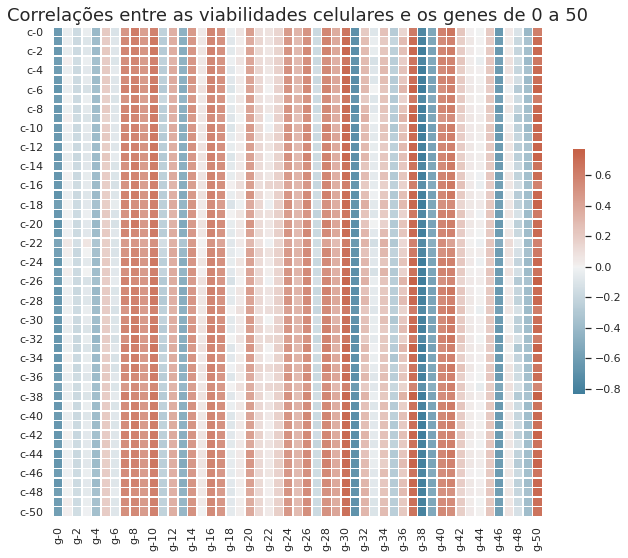

In [82]:
#Filtra as classes Cs e Gs
viab_celular = dados.loc[:,'c-0':'c-50']
genes = dados.loc[:,'g-0':'g-50']

#Concatena nas colunas, calcula a correlação das classes e seleciona as linhas com C e colunas com G
dados_corr = pd.concat([viab_celular, genes], axis=1).corr().loc['c-0':'c-50','g-0':'g-50']

#Redimensiona a figura
f, ax = plt.subplots(figsize=(11, 9))

#Cria uma paleta de cores divergente
cmap = sns.diverging_palette(230, 20, as_cmap=True)

#Desenha o heatmap aplicando a mascara e o cmap criado anteriormente
sns.heatmap(dados_corr, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

ax.set_title('Correlações entre as viabilidades celulares e os genes de 0 a 50',fontsize=18)

plt.show()

O gráfico acima nos dá algumas informações importantes. Como vimos no gráfico anterior, as viabilidades celulares estão com uma **alta correlação positiva**, então faz sentido vermos cada quadradinho com uma correlação bem próxima na mesma coluna. Além disso, podemos perceber muito mais colunas avermelhadas do que azuladas. Isso se deve a alta correlação positiva da maoiria dos casos estudos.

Biologicamente, esses fatos indicam que, possivelmente, quem está alterando de fato os resultados do experimento é o **gene**, isso pois as **viabilidades celulares se comportam de forma muito parecida entre elas**, então as mudanças dos experimentos podem ser reflexos das **mudanças dos genes**. 

Não só isso, mas também podemos ver nos experimentos que na maioria dos casos selecionados, por conta da maioria das correlações serem diretamente proporcionais, quando, ao aplicar um composto em determinada cultura celular, um gene se expressa mais, a viabilidade celular aumenta (morrem mais células).

Importante lembrar que isso são apenas indícios pois, via de regra, **correlação não implica causalidade.**

####Desafio - Resumo da aula

Resumo do que foi aprendido:

*   Cruzar classes com `crosstab()`

*   Utilizar proporção e agregadores em dados agrupados

*   Criar gráficos de dispersão com `scatterplot()` e `lmplot()` do *seaborn*

*   Criar *heatmaps* de correlação com o `heatmap()` do *seaborn*
